In [49]:
import numpy as np
import pandas as pd

In [50]:
from gensim.models import Word2Vec
skipgram = Word2Vec.load('w2vtrain300.bin')

In [51]:
print("The total number of words are : ",len(skipgram.wv))

The total number of words are :  62269


In [52]:
skipgram.wv.similarity('yêu_thích','yêu_mến')

0.6100828

In [53]:
vocab=list(skipgram.wv.index_to_key)

In [54]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=skipgram.wv[word]
print("The no of key-value pairs : ",len(word_vec_dict)) 

The no of key-value pairs :  62269


In [55]:
data = pd.read_csv('final_data.csv')

In [56]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Title_processed,Content_processed,label,Length
0,0,1,thúc_đẩy quan_hệ hợp_tác quốc_hội việt_nam nhâ...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,274
1,1,2,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,229
2,2,3,giám_đốc công_an hà_nội vụ_án rửa tiền ước_tín...,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...,1,229
3,3,4,ông võ_văn_thưởng hội_đàm trực_tuyến bí_thư ba...,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...,1,79
4,4,5,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,1,299


In [57]:
stringdata=[]
for i in range(len(data)):
    stringdata.append(str(data.Title_processed[i])+' '+str(data.Content_processed[i]))

In [58]:
data['Title_Content_processed']=stringdata

In [59]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Title_processed,Content_processed,label,Length,Title_Content_processed
0,0,1,thúc_đẩy quan_hệ hợp_tác quốc_hội việt_nam nhâ...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,274,thúc_đẩy quan_hệ hợp_tác quốc_hội việt_nam nhâ...
1,1,2,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,1,229,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...
2,2,3,giám_đốc công_an hà_nội vụ_án rửa tiền ước_tín...,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...,1,229,giám_đốc công_an hà_nội vụ_án rửa tiền ước_tín...
3,3,4,ông võ_văn_thưởng hội_đàm trực_tuyến bí_thư ba...,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...,1,79,ông võ_văn_thưởng hội_đàm trực_tuyến bí_thư ba...
4,4,5,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...,1,299,tổng_bí_thư nguyễn_phú_trọng hội_kiến thủ_tướn...


In [60]:
maxi=-1
for i,rev in enumerate(data['Title_Content_processed']):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(maxi)

1085


In [61]:
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split,cross_validate
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

In [62]:
tok = Tokenizer()
tok.fit_on_texts(data['Title_Content_processed'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(data['Title_Content_processed'])

In [93]:
vocab_size

15275

In [63]:
max_rev_len=1085  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [64]:
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape 

(2008, 1085)

In [65]:
pad_rev[0]

array([330, 227,  26, ...,   0,   0,   0])

In [66]:
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector

In [67]:
print(embed_matrix[14])

[-0.28183103 -0.03912653  0.10056827  0.03901356  0.02785202 -0.31145567
 -0.03024101  0.45011729 -0.13029948 -0.23684879 -0.36536217  0.2560862
 -0.09882434  0.12620136 -0.24207723 -0.28044248  0.53277868  0.00768296
  0.40378445  0.06528721 -0.114248   -0.32382485  0.05861918 -0.16303404
  0.21226084 -0.10544066  0.04176835 -0.29302406 -0.23391014  0.15610525
 -0.14662646 -0.17257653 -0.04311708 -0.43926942 -0.12563704  0.1548277
 -0.26053938 -0.03665499 -0.39927766 -0.3079522  -0.243477   -0.13371997
 -0.1634859   0.03712539  0.0954267   0.37649038  0.07492974 -0.05473397
 -0.15644701 -0.11560234  0.1857481  -0.13930148  0.19776966 -0.17389007
 -0.12496211  0.03939854  0.16503991 -0.25681877  0.05824628 -0.01610592
 -0.23790444 -0.50178903 -0.58323836 -0.14671637  0.50868982  0.25095317
  0.12086596 -0.05767003 -0.35980478  0.22709617 -0.07917779 -0.10323571
  0.37461233  0.57669365 -0.014022    0.38817742 -0.43517086  0.00539866
 -0.13564549  0.18053196  0.2712591  -0.16669835  0.2

In [68]:
pad_rev[0]

array([330, 227,  26, ...,   0,   0,   0])

In [69]:
pad_rev[1]

array([59, 66, 50, ...,  0,  0,  0])

In [70]:
Y=keras.utils.to_categorical(data['label'])  # one hot target as required by NN.
x_train,x_test,y_train,y_test=train_test_split(pad_rev,Y,test_size=0.20,random_state=42)

In [71]:
# from sklearn.decomposition import PCA

In [72]:
from keras.initializers import Constant
from keras.layers import ReLU
from keras.layers import Dropout

In [73]:

model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
# model.add(CuDNNLSTM(64,return_sequences=False)) # loss stucks at about 
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.50))
# model.add(Dense(16,activation='relu'))
# model.add(Dropout(0.20))
model.add(Dense(2,activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1085, 300)         4582500   
                                                                 
 flatten (Flatten)           (None, 325500)            0         
                                                                 
 dense_1 (Dense)             (None, 16)                5208016   
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 9,790,550
Trainable params: 9,790,550
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-2),loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\hotai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [76]:
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>

In [77]:
epochs=50
batch_size=64

In [78]:
x_train[0]

array([ 124,   77, 1088, ...,    0,    0,    0])

In [79]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/50
26/26 [==============================] - 10s 313ms/step - loss: 7.1992 - accuracy: 0.5392 - val_loss: 0.6928 - val_accuracy: 0.5224
Epoch 2/50
26/26 [==============================] - 7s 254ms/step - loss: 0.8227 - accuracy: 0.5455 - val_loss: 0.6921 - val_accuracy: 0.5224
Epoch 3/50
26/26 [==============================] - 7s 289ms/step - loss: 0.7922 - accuracy: 0.5448 - val_loss: 0.6922 - val_accuracy: 0.5224
Epoch 4/50
26/26 [==============================] - 7s 264ms/step - loss: 0.7629 - accuracy: 0.5411 - val_loss: 0.6923 - val_accuracy: 0.5224
Epoch 5/50
26/26 [==============================] - 6s 247ms/step - loss: 1.5410 - accuracy: 0.5430 - val_loss: 0.6873 - val_accuracy: 0.5224
Epoch 6/50
26/26 [==============================] - 7s 253ms/step - loss: 0.8171 - accuracy: 0.5399 - val_loss: 0.6645 - val_accuracy: 0.5224
Epoch 7/50
26/26 [==============================] - 7s 257ms/step - loss: 0.8549 - accuracy: 0.6476 - val_loss: 0.5399 - val_accuracy: 0.8806
Epoch

In [80]:
from matplotlib import pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


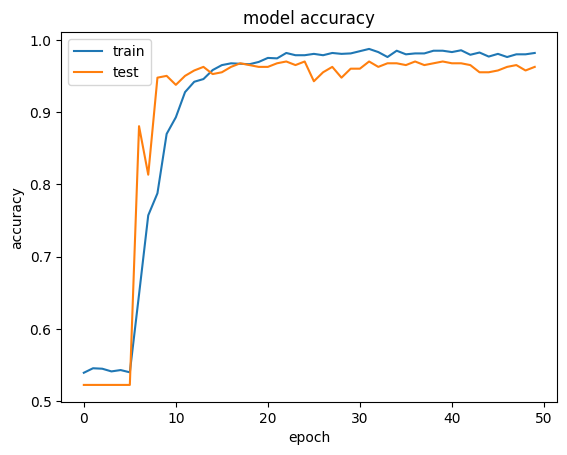

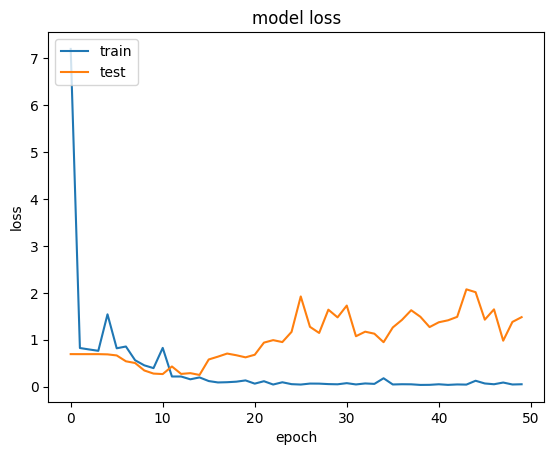

In [81]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
# model.evaluate(x_test,y_test)

In [83]:
from keras.models import load_model

In [84]:
model.save('LSTM_model.h5')  # creates a HDF5 file 'my_model.h5'
del model

In [85]:
model = load_model('LSTM_model.h5')

In [86]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 39ms/step - loss: 1.4809 - accuracy: 0.9627


[1.4809260368347168, 0.9626865386962891]

In [87]:
# def FunctionText2Vec_N(inpTextData):
#     W2Vec_Data=[]
#     for i in inpTextData:
#         Sentence = []
#         WordsVocab=str(i).split()
#         for j in range(1050):
#             try:
#                 Sentence.append(skipgram.wv[WordsVocab[j]])
#             except:
#                 Sentence.append(np.zeros(300))       
#         W2Vec_Data.append(Sentence)     
#     return(W2Vec_Data)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(data.Title_Content_processed,data.label,test_size=0.30,random_state=42)

In [89]:
# x_train_np= data_Vector=np.array(FunctionText2Vec_N(x_train))

In [90]:
# x_test_np= data_Vector=np.array(FunctionText2Vec_N(x_test))